# Define Patterns and Output

In [ ]:
# Import Python Libraries
import numpy as np

# Take two sets of patterns:
# Set A: Input Pattern
#sample 1
x1 = np.array([[-1,1,1],
               [1,-1,-1],
               [1,-1,-1],
               [1,-1,-1],
               [-1,1,1]])
x1=x1.reshape(15, 1)
#sample 2
x2 = np.array([[1,1,1],
               [1,-1,-1],
               [1,1,-1],
               [1,-1,-1],
               [1,1,1]])
x2=x2.reshape(15, 1)
#sample 3
x3 = np.array([[1,1,1],
               [1,-1,1],
               [1,1,1],
               [1,1,-1],
               [1,-1,1]])
x3=x3.reshape(15, 1)
#sample 4
x4 = np.array([[-1,1,-1],
               [1,-1,1],
               [1,-1,1],
               [1,-1,1],
               [-1,1,-1]])
x4=x4.reshape(15, 1)
#sample 5
x5 = np.array([[1,1,1],
               [1,-1,-1],
               [1,1,-1],
               [1,-1,-1],
               [1,-1,-1]])
x5=x5.reshape(15, 1)
#sample 6
x6 = np.array([[1,1,1],
               [1,-1,1],
               [1,1,1],
               [1,-1,-1],
               [1,-1,-1]])
x6=x6.reshape(15, 1)
# Set B: Target Pattern
y1 = np.array([-1, -1, -1]).reshape(3, 1)
y2 = np.array([-1, -1, 1]).reshape(3, 1)
y3 = np.array([-1, 1, -1]).reshape(3, 1)
y4 = np.array([-1, 1, 1]).reshape(3, 1)
y5 = np.array([1, -1, -1]).reshape(3, 1)
y6 = np.array([1, -1, 1]).reshape(3, 1)



# Concatenating Inputs and Outputs in one array,
# Creating Weight matrix

In [ ]:
inputSet = np.hstack((x1,x2,x3,x4,x5,x6))
targetSet = np.hstack((y1,y2,y3,y4,y5,y6))
weight = inputSet @ targetSet.T
weight

array([[ 2, -2,  0],
       [-2, -2,  0],
       [ 0, -4, -2],
       [-2, -2,  0],
       [ 2,  2,  0],
       [ 0,  4,  2],
       [-2, -2,  0],
       [ 2, -2,  0],
       [ 0,  4,  2],
       [-2, -2,  0],
       [ 0,  4, -2],
       [ 0,  4,  2],
       [ 2, -2,  0],
       [-4,  0,  2],
       [-4,  0, -2]])

# Define a function to Visualize Patterns

In [ ]:
def reshape_to_pattern(arr):
  arr_new=arr.copy().astype('str')
  arr_new[np.where(arr_new=='-1')[0]]='.'
  arr_new[np.where(arr_new=='1')[0]]='@'
  print(arr_new.reshape((5,3)))
  print("\n")

In [ ]:
for i,row in enumerate(inputSet.T):
  print(f"Input X{i+1}:\n")
  reshape_to_pattern(row)
  

Input X1:

[['.' '@' '@']
 ['@' '.' '.']
 ['@' '.' '.']
 ['@' '.' '.']
 ['.' '@' '@']]


Input X2:

[['@' '@' '@']
 ['@' '.' '.']
 ['@' '@' '.']
 ['@' '.' '.']
 ['@' '@' '@']]


Input X3:

[['@' '@' '@']
 ['@' '.' '@']
 ['@' '@' '@']
 ['@' '@' '.']
 ['@' '.' '@']]


Input X4:

[['.' '@' '.']
 ['@' '.' '@']
 ['@' '.' '@']
 ['@' '.' '@']
 ['.' '@' '.']]


Input X5:

[['@' '@' '@']
 ['@' '.' '.']
 ['@' '@' '.']
 ['@' '.' '.']
 ['@' '.' '.']]


Input X6:

[['@' '@' '@']
 ['@' '.' '@']
 ['@' '@' '@']
 ['@' '.' '.']
 ['@' '.' '.']]




# Weighted matrix for first three samples(Part A)

In [ ]:
three_seq=np.hstack((x1,x2,x3))
three_target=np.hstack((y1,y2,y3)).T
# Calculate weight Matrix for firt three sample: W
W=three_seq @ three_target.T
W

array([[-1,  1,  1],
       [-3, -1, -1],
       [-3, -1, -1],
       [-3, -1, -1],
       [ 3,  1,  1],
       [ 1,  3, -1],
       [-3, -1, -1],
       [-1,  1,  1],
       [ 1,  3, -1],
       [-3, -1, -1],
       [ 1,  3, -1],
       [ 3,  1,  1],
       [-1,  1,  1],
       [-1, -3,  1],
       [-3, -1, -1]])

# Part B

# Define the recurrent Input and Output functions

In [ ]:
def testInputs(y_old , x, weight):
  # Multiply the input pattern with the weight matrix
  # (weight.T X x)
  y = weight.T @ x
  for i,row in enumerate(y.T):
    row[row < 0] = -1
    row[row >= 0] = 1
    row[row==0] =y_old.T[i,:][np.where(row==0)[0]]
  return np.array(y)

In [ ]:
def testTargets(x_old, y, weight):
  # Multiply the target pattern with the weight matrix
  # (weight X y)
  x = weight @ y
  for i,row in enumerate(x.T):
    row[row < 0] = -1
    row[row > 0] = 1
    row[row==0] =x_old.T[i,:][np.where(row==0)[0]]
  return np.array(x)

In [ ]:
three_seq

array([[-1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [-1, -1, -1],
       [-1, -1,  1],
       [ 1,  1,  1],
       [-1,  1,  1],
       [-1, -1,  1],
       [ 1,  1,  1],
       [-1, -1,  1],
       [-1, -1, -1],
       [-1,  1,  1],
       [ 1,  1, -1],
       [ 1,  1,  1]])

In [ ]:
three_target

array([[-1, -1, -1],
       [-1, -1,  1],
       [-1,  1, -1]])

# Testing ( First calculated input and output )

In [ ]:
testTargets(three_seq , three_target, weight)

array([[-1,  1, -1],
       [ 1,  1,  1],
       [ 1,  1, -1],
       [ 1,  1,  1],
       [-1, -1, -1],
       [-1, -1,  1],
       [ 1,  1,  1],
       [-1,  1, -1],
       [-1, -1,  1],
       [ 1,  1,  1],
       [-1, -1,  1],
       [-1, -1,  1],
       [-1,  1, -1],
       [ 1,  1,  1],
       [ 1,  1,  1]])

In [ ]:
testInputs(three_target , three_seq , weight)

array([[-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1]])

# Testing for convergence

In [ ]:
num_sample=3
#zero step
Res=three_target
In=three_seq 
for j,row in enumerate(In[0:15,:].T):
  print(f"Input X{j+1}:\n")
  reshape_to_pattern(row)
#start
i=1
print(f"number of iteration is {i}\n")
Res=np.vstack((Res,testInputs(three_target ,three_seq  ,weight)))
In=np.vstack((In,testTargets(three_seq  , Res[3:6,:], weight)))
#reconst output
for j,row in enumerate(Res[3*i:3*(i+1),:].T):
  print(f"Reconstructed y{j+1}:\n")
  print(row)
  print("\n")
#Comparison of outputs
print(f"element by element comparison of the given output and the reconstructed one :\n {Res[3*i:3*(i+1),:]==Res[0:3,:]}\n")
#reconst input  
for j,row in enumerate(In[15*i:15*(i+1),:].T):
  print(f"Reconstructed X{j+1}:\n")
  reshape_to_pattern(row)  

while np.sum((Res[3*i:3*(i+1),:]==Res[3*(i-1):3*i,:]).flatten().astype('int'))!=(3*num_sample) or np.sum((In[15*i:15*(i+1),:]==In[15*(i-1):15*i,:]).flatten().astype('int'))!=(15*num_sample):
  Res=np.vstack((Res,testInputs(Res[3*i:3*(i+1),:],In[15*i:15*(i+1),:] ,weight)))
  i+=1
  In=np.vstack((In,testTargets(In[15*(i-1):15*i,:] , Res[3*i:3*(i+1),:], weight)))
  #num iter
  print(f"number of iteration is {i}\n")
  #reconst output
  for j,row in enumerate(Res[3*i:3*(i+1),:].T):
    print(f"Reconstructed y{j+1}:\n")
    print(row)
    print("\n")
  #Comparison of outputs
  print(f"element by element comparison of the given output and the reconstructed one :\n {Res[3*i:3*(i+1),:]==Res[0:3,:]}\n")
  #reconst input
  for j,row in enumerate(In[15*i:15*(i+1),:].T):
    print(f"Reconstructed X{j+1}:\n")
    reshape_to_pattern(row)



Input X1:

[['.' '@' '@']
 ['@' '.' '.']
 ['@' '.' '.']
 ['@' '.' '.']
 ['.' '@' '@']]


Input X2:

[['@' '@' '@']
 ['@' '.' '.']
 ['@' '@' '.']
 ['@' '.' '.']
 ['@' '@' '@']]


Input X3:

[['@' '@' '@']
 ['@' '.' '@']
 ['@' '@' '@']
 ['@' '@' '.']
 ['@' '.' '@']]


number of iteration is 1

Reconstructed y1:

[-1 -1 -1]


Reconstructed y2:

[-1 -1 -1]


Reconstructed y3:

[-1 -1 -1]


element by element comparison of the given output and the reconstructed one :
 [[ True  True  True]
 [ True  True False]
 [ True False  True]]

Reconstructed X1:

[['.' '@' '@']
 ['@' '.' '.']
 ['@' '.' '.']
 ['@' '.' '.']
 ['.' '@' '@']]


Reconstructed X2:

[['@' '@' '@']
 ['@' '.' '.']
 ['@' '@' '.']
 ['@' '.' '.']
 ['@' '@' '@']]


Reconstructed X3:

[['@' '@' '@']
 ['@' '.' '.']
 ['@' '@' '.']
 ['@' '.' '.']
 ['@' '@' '@']]


number of iteration is 2

Reconstructed y1:

[-1 -1 -1]


Reconstructed y2:

[-1 -1 -1]


Reconstructed y3:

[-1 -1 -1]


element by element comparison of the given output and 

In [ ]:
import random
random.seed(101)
random.sample(range(1, 15), 6)

[10, 4, 9, 6, 8, 1]

# Insert noise to all inputs/outputs(Part C)

In [ ]:
num_sample=3
#zero step
#random.seed(101)
Results=np.zeros((100,num_sample))
for n in range(100):
  new_set=three_seq.copy()
  for row in new_set.T:
    random_list=random.sample(range(0, 15), 6)
    row[random_list]=-row[random_list]

  In=new_set
  Res=three_target
  #start
  i=1
  #print(f"number of iteration is {i}\n")
  Res=np.vstack((Res,testInputs(three_target ,new_set ,weight)))
  In=np.vstack((In,testTargets(new_set , Res[3:6,:], weight)))

  while np.sum((Res[3*i:3*(i+1),:]==Res[3*(i-1):3*i,:]).flatten().astype('int'))!=(3*num_sample) or np.sum((In[15*i:15*(i+1),:]==In[15*(i-1):15*i,:]).flatten().astype('int'))!=(15*num_sample):
    Res=np.vstack((Res,testInputs(Res[3*i:3*(i+1),:],In[15*i:15*(i+1),:] ,weight)))
    i+=1
    In=np.vstack((In,testTargets(In[15*(i-1):15*i,:] , Res[3*i:3*(i+1),:], weight)))
  #Finally  
  print(f"number of totall iterations is {i}\n")
  Results[n,:]=np.round(np.sum((Res[3*i:3*(i+1),:]==Res[0:3,:]).astype('int'),axis=0)/3*100,2)


number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 2

number of totall iterations is 2

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 2

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 2

number of totall iterations is 3

number of totall iterations is 2

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 2

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 2

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of tota

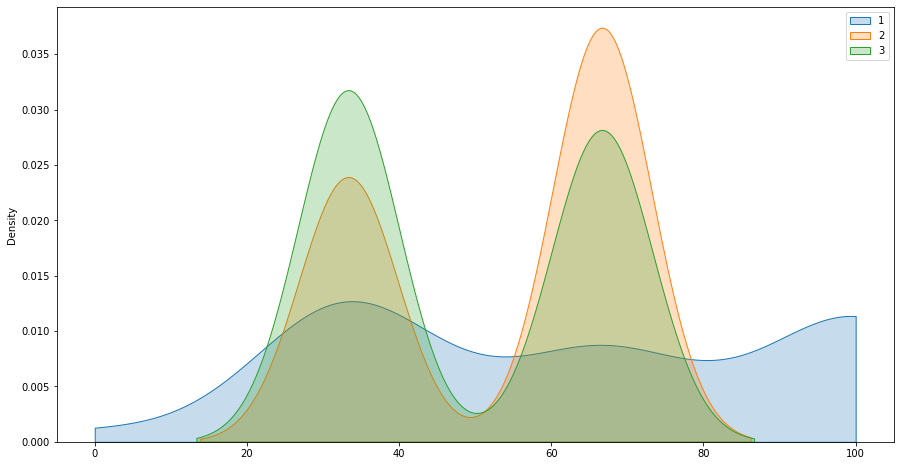

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
for i in range(3):
  sns.kdeplot(Results[:,i],shade=True,clip=[0,100])
plt.legend(np.arange(1,7))

In [ ]:
new_res=Results.copy()
for row in new_res:
  row[row<100]=0
  row[row==100]=1
#new_res[0,:][new_res[0,:]==100]=1

<Figure size 864x432 with 0 Axes>

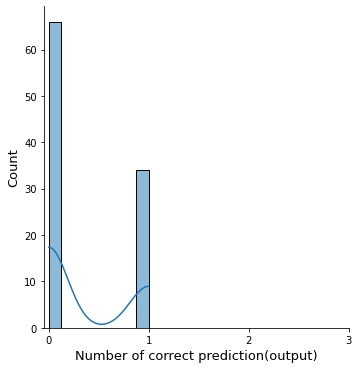

In [ ]:
plt.figure(figsize=(12,6))
sns.displot(np.sum(new_res,axis=1),bins=8,kde=True)
plt.xlabel('Number of correct prediction(output)',size=13)
plt.ylabel('Count',size=13)
plt.xticks([0,1,2,3]);

# Part E

In [ ]:
num_sample=6
#zero step
Res=targetSet
In=inputSet
for j,row in enumerate(In[0:15,:].T):
  print(f"Input X{j+1}:\n")
  reshape_to_pattern(row)
#start
i=1
print(f"number of iteration is {i}\n")
Res=np.vstack((Res,testInputs(targetSet,inputSet ,weight)))
In=np.vstack((In,testTargets(inputSet  , Res[3:6,:], weight)))
#reconst output
for j,row in enumerate(Res[3*i:3*(i+1),:].T):
  print(f"Reconstructed y{j+1}:\n")
  print(row)
  print("\n")
#Comparison of outputs
print(f"element by element comparison of the given output and the reconstructed one :\n {Res[3*i:3*(i+1),:]==Res[0:3,:]}\n")
#reconst input  
for j,row in enumerate(In[15*i:15*(i+1),:].T):
  print(f"Reconstructed X{j+1}:\n")
  reshape_to_pattern(row)  

while np.sum((Res[3*i:3*(i+1),:]==Res[3*(i-1):3*i,:]).flatten().astype('int'))!=(3*num_sample) or np.sum((In[15*i:15*(i+1),:]==In[15*(i-1):15*i,:]).flatten().astype('int'))!=(15*num_sample):
  Res=np.vstack((Res,testInputs(Res[3*i:3*(i+1),:],In[15*i:15*(i+1),:] ,weight)))
  i+=1
  In=np.vstack((In,testTargets(In[15*(i-1):15*i,:] , Res[3*i:3*(i+1),:], weight)))
  #num iter
  print(f"number of iteration is {i}\n")
  #reconst output
  for j,row in enumerate(Res[3*i:3*(i+1),:].T):
    print(f"Reconstructed y{j+1}:\n")
    print(row)
    print("\n")
  #Comparison of outputs
  print(f"element by element comparison of the given output and the reconstructed one :\n {Res[3*i:3*(i+1),:]==Res[0:3,:]}\n")
  #reconst input
  for j,row in enumerate(In[15*i:15*(i+1),:].T):
    print(f"Reconstructed X{j+1}:\n")
    reshape_to_pattern(row)



Input X1:

[['.' '@' '@']
 ['@' '.' '.']
 ['@' '.' '.']
 ['@' '.' '.']
 ['.' '@' '@']]


Input X2:

[['@' '@' '@']
 ['@' '.' '.']
 ['@' '@' '.']
 ['@' '.' '.']
 ['@' '@' '@']]


Input X3:

[['@' '@' '@']
 ['@' '.' '@']
 ['@' '@' '@']
 ['@' '@' '.']
 ['@' '.' '@']]


Input X4:

[['.' '@' '.']
 ['@' '.' '@']
 ['@' '.' '@']
 ['@' '.' '@']
 ['.' '@' '.']]


Input X5:

[['@' '@' '@']
 ['@' '.' '.']
 ['@' '@' '.']
 ['@' '.' '.']
 ['@' '.' '.']]


Input X6:

[['@' '@' '@']
 ['@' '.' '@']
 ['@' '@' '@']
 ['@' '.' '.']
 ['@' '.' '.']]


number of iteration is 1

Reconstructed y1:

[-1 -1 -1]


Reconstructed y2:

[-1 -1 -1]


Reconstructed y3:

[-1 -1 -1]


Reconstructed y4:

[-1  1  1]


Reconstructed y5:

[ 1 -1 -1]


Reconstructed y6:

[ 1 -1  1]


element by element comparison of the given output and the reconstructed one :
 [[ True  True  True  True  True  True]
 [ True  True False  True  True  True]
 [ True False  True  True  True  True]]

Reconstructed X1:

[['.' '@' '@']
 ['@' '.' '.']
 

In [ ]:
num_sample=6
#zero step
#random.seed(101)
Results=np.zeros((100,num_sample))
for n in range(100):
  new_set=inputSet.copy()
  for row in new_set.T:
    random_list=random.sample(range(0, 15), 6)
    row[random_list]=-row[random_list]

  In=new_set
  Res=targetSet
  #start
  i=1
  #print(f"number of iteration is {i}\n")
  Res=np.vstack((Res,testInputs(targetSet ,new_set ,weight)))
  In=np.vstack((In,testTargets(new_set , Res[3:6,:], weight)))

  while np.sum((Res[3*i:3*(i+1),:]==Res[3*(i-1):3*i,:]).flatten().astype('int'))!=(3*num_sample) or np.sum((In[15*i:15*(i+1),:]==In[15*(i-1):15*i,:]).flatten().astype('int'))!=(15*num_sample):
    Res=np.vstack((Res,testInputs(Res[3*i:3*(i+1),:],In[15*i:15*(i+1),:] ,weight)))
    i+=1
    In=np.vstack((In,testTargets(In[15*(i-1):15*i,:] , Res[3*i:3*(i+1),:], weight)))
  #Finally  
  print(f"number of totall iterations is {i}\n")
  Results[n,:]=np.round(np.sum((Res[3*i:3*(i+1),:]==Res[0:3,:]).astype('int'),axis=0)/3*100,2)


number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 2

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 2

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 2

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of totall iterations is 3

number of tota

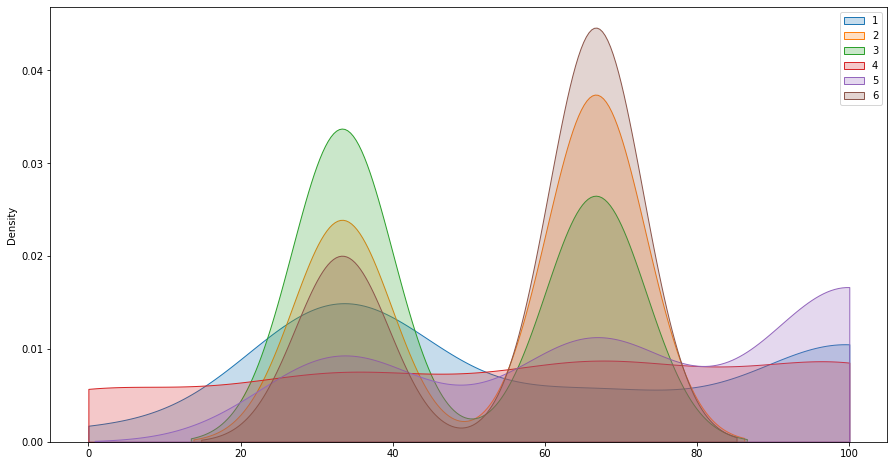

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
for i in range(6):
  sns.kdeplot(Results[:,i],shade=True,clip=[0,100])
plt.legend(np.arange(1,7))

In [ ]:
new_res=Results.copy()
for row in new_res:
  row[row<100]=0
  row[row==100]=1
#new_res[0,:][new_res[0,:]==100]=1

<Figure size 864x432 with 0 Axes>

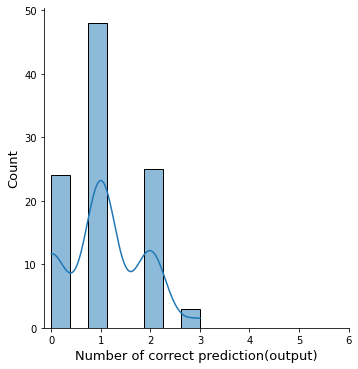

In [ ]:
plt.figure(figsize=(12,6))
sns.displot(np.sum(new_res,axis=1),bins=8,kde=True)
plt.xlabel('Number of correct prediction(output)',size=13)
plt.ylabel('Count',size=13)
plt.xticks([0,1,2,3,4,5,6]);

In [ ]:
Mat=np.zeros((6,6))
for i in range(6):
  for j in range(6):
    Mat[i,j]=np.linalg.norm(inputSet[:,j]-inputSet[:,i])

In [ ]:
Mat

array([[0.        , 3.46410162, 5.29150262, 4.47213595, 4.47213595,
        5.29150262],
       [3.46410162, 0.        , 4.        , 5.65685425, 2.82842712,
        4.        ],
       [5.29150262, 4.        , 0.        , 5.65685425, 4.        ,
        2.82842712],
       [4.47213595, 5.65685425, 5.65685425, 0.        , 5.65685425,
        4.89897949],
       [4.47213595, 2.82842712, 4.        , 5.65685425, 0.        ,
        2.82842712],
       [5.29150262, 4.        , 2.82842712, 4.89897949, 2.82842712,
        0.        ]])

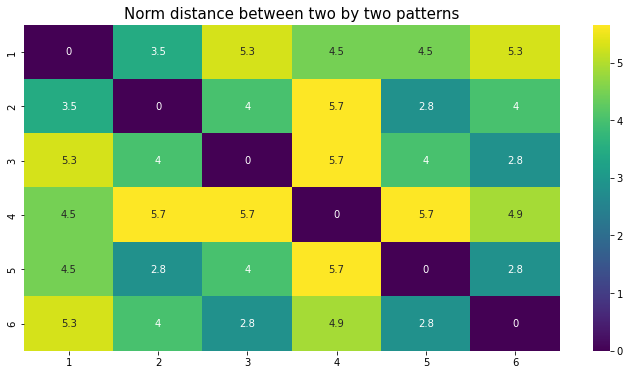

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(Mat,cmap='viridis',annot=True,xticklabels=np.arange(1,7),yticklabels=np.arange(1,7))
plt.title("Norm distance between two by two patterns",size=15);

In [ ]:
np.linalg.norm(inputSet[:,4]-inputSet[:,5])

2.8284271247461903